In [2]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math 

In [3]:
from sympy import symbols, simplify, solve, diff, lambdify
import sympy as sym
from sympy import Symbol
import scipy.integrate
import matplotlib.pyplot as plt
mesh = Make1DMesh(10, mapping=None, periodic=False)

axial_load_1 = 8.28*pi**2
lamda_2 = 8.9868
c_1 = 2*sym.sqrt((axial_load_1)/(lamda_2**2)-1)


psi_ex_1 = c_1*(1 - ((lamda_2*(1- cos(lamda_2)))/(lamda_2 - sin(lamda_2)))*x - \
                        cos(lamda_2*x) + \
                        ((1 - cos(lamda_2))/(lamda_2 - sin(lamda_2)))*sin(lamda_2*x))


axial_load_2 = 9.0*pi**2
lamda_2 = 8.9868
c_2 = 2*sym.sqrt((axial_load_2)/(lamda_2**2)-1)


psi_ex_2 = c_2*(1 - ((lamda_2*(1- cos(lamda_2)))/(lamda_2 - sin(lamda_2)))*x - \
                        cos(lamda_2*x) + \
                        ((1 - cos(lamda_2))/(lamda_2 - sin(lamda_2)))*sin(lamda_2*x))


axial_load_3 = 9.5*pi**2
lamda_2 = 8.9868
c_3 = 2*sym.sqrt((axial_load_3)/(lamda_2**2)-1)


psi_ex_3 = c_3*(1 - ((lamda_2*(1- cos(lamda_2)))/(lamda_2 - sin(lamda_2)))*x - \
                        cos(lamda_2*x) + \
                        ((1 - cos(lamda_2))/(lamda_2 - sin(lamda_2)))*sin(lamda_2*x))



Text(0.5, 1.0, 'Analytical Solution Second Mode')

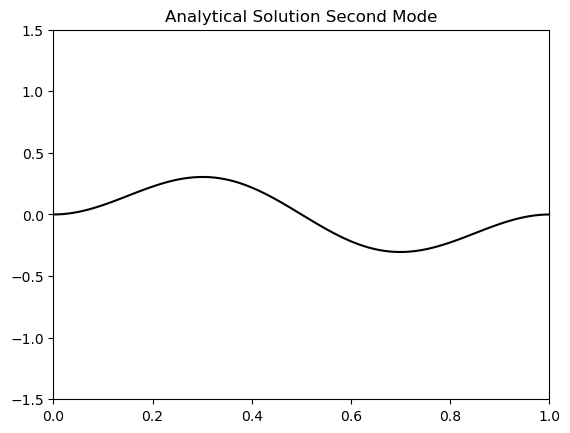

In [4]:
mesh = Make1DMesh(40)

# Draw(psi_ex,mesh, deformation=CF( (0,psi_ex,0) ))
x=np.linspace(0,1,100)
psi_ex_1(mesh(x))
psi_ex_2(mesh(x))
psi_ex_3(mesh(x))
plt.plot(x,psi_ex_1(mesh(x)),color='black',label='P = 8.28$\pi^2$',linestyle="-")
# plt.plot(x,psi_ex_2(mesh(x)),color='black',label='P = 9.0$\pi^2$',linestyle="--")
# plt.plot(x,psi_ex_3(mesh(x)),color='black',label='P = 9.5$\pi^2$',linestyle="-.")
plt.ylim([-1.5, 1.5])
plt.xlim([0.0, 1.0])
plt.title("Analytical Solution Second Mode")
# plt.legend()
# Draw(sigma_ex,mesh, deformation=CF( (0,sigma_ex,0) ))


In [ ]:
psi = H1(mesh, order=2, dirichlet="left|right")
sigma = H1(mesh, order=2, dirichlet=" ")
mu = NumberSpace(mesh)
fesm = psi*sigma*mu
print ("ndof =", fesm.ndof)

In [ ]:
psi, sigma, mu = fesm.TrialFunction()
v , tau, lamda = fesm.TestFunction()

In [ ]:
am_1 = BilinearForm(fesm)
am_1 += (-grad(sigma)*grad(v) - axial_load_1*grad(psi)*grad(v) + 1/2*grad(psi)*grad(v)*mu + sigma*tau \
       + grad(psi)*grad(tau) + mu*lamda - grad(psi)**2*lamda )*dx

gfu_1 = GridFunction(fesm)

def SimpleNewtonSolve(gfu,am_1,tol=1e-13,maxits=25):
    res = gfu.vec.CreateVector()
    du = gfu.vec.CreateVector()
    fesm = gfu_1.space
    for it in range(maxits):
        print ("Iteration {:3}  ".format(it),end="")
        am_1.Apply(gfu.vec, res)
        am_1.AssembleLinearization(gfu.vec)
        du.data = am_1.mat.Inverse(fesm.FreeDofs()) * res
        gfu.vec.data -= du

        #stopping criteria
        stopcritval = sqrt(abs(InnerProduct(du,res)))
        print ("<A u",it,", A u",it,">_{-1}^0.5 = ", stopcritval)
        if stopcritval < tol:
            break
gfu_1.components[0].Set(psi_ex_1)
SimpleNewtonSolve(gfu_1,am_1)

In [ ]:
am_2 = BilinearForm(fesm)
am_2 += (-grad(sigma)*grad(v) - axial_load_2*grad(psi)*grad(v) + 1/2*grad(psi)*grad(v)*mu + sigma*tau \
       + grad(psi)*grad(tau) + mu*lamda - grad(psi)**2*lamda )*dx

gfu_2 = GridFunction(fesm)

def SimpleNewtonSolve(gfu,am_2,tol=1e-13,maxits=25):
    res = gfu.vec.CreateVector()
    du = gfu.vec.CreateVector()
    fes = gfu.space
    for it in range(maxits):
        print ("Iteration {:3}  ".format(it),end="")
        am_2.Apply(gfu.vec, res)
        am_2.AssembleLinearization(gfu.vec)
        du.data = am_2.mat.Inverse(fes.FreeDofs()) * res
        gfu.vec.data -= du

        #stopping criteria
        stopcritval = sqrt(abs(InnerProduct(du,res)))
        print ("<A u",it,", A u",it,">_{-1}^0.5 = ", stopcritval)
        if stopcritval < tol:
            break
gfu_2.components[0].Set(psi_ex_2)
SimpleNewtonSolve(gfu_2,am_2)

In [ ]:
am_3 = BilinearForm(fesm)
am_3 += (-grad(sigma)*grad(v) - axial_load_3*grad(psi)*grad(v) + 1/2*grad(psi)*grad(v)*mu + sigma*tau \
       + grad(psi)*grad(tau) + mu*lamda - grad(psi)**2*lamda )*dx

gfu_3 = GridFunction(fesm)

def SimpleNewtonSolve(gfu,am_3,tol=1e-13,maxits=25):
    res = gfu.vec.CreateVector()
    du = gfu.vec.CreateVector()
    fes = gfu.space
    for it in range(maxits):
        print ("Iteration {:3}  ".format(it),end="")
        am_3.Apply(gfu.vec, res)
        am_3.AssembleLinearization(gfu.vec)
        du.data = am_3.mat.Inverse(fes.FreeDofs()) * res
        gfu.vec.data -= du

        #stopping criteria
        stopcritval = sqrt(abs(InnerProduct(du,res)))
        print ("<A u",it,", A u",it,">_{-1}^0.5 = ", stopcritval)
        if stopcritval < tol:
            break
gfu_3.components[0].Set(psi_ex_3)
SimpleNewtonSolve(gfu_3,am_3)

In [ ]:
Draw(gfu_1.components[0],mesh,deformation=CF((0,gfu_1.components[0],0)))

Draw(gfu_2.components[0],mesh,deformation=CF((0,gfu_2.components[0],0)))
Draw(gfu_3.components[0],mesh,deformation=CF((0,gfu_3.components[0],0)))

In [ ]:
print ("L2-error:", sqrt(Integrate((gfu_1.components[0] - psi_ex_1)**2, mesh)))
print ("L2-error:", sqrt(Integrate((gfu_2.components[0] - psi_ex_2)**2, mesh)))
print ("L2-error:", sqrt(Integrate((gfu_3.components[0] - psi_ex_3)**2, mesh)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,1,100)
gfu_1.components[0](mesh(x))
gfu_2.components[0](mesh(x))
gfu_3.components[0](mesh(x))
plt.plot(x,gfu_1.components[0](mesh(x)),color='black',label='P = 8.28$\pi^2$',linestyle="-")
plt.plot(x,gfu_2.components[0](mesh(x)),color='black',label='P = 9.0$\pi^2$',linestyle="--")
plt.plot(x,gfu_3.components[0](mesh(x)),color='black',label='P = 9.5$\pi^2$',linestyle="-.")
plt.legend()
plt.ylim([-1.5, 1.5])
plt.xlim([0.0, 1.0])
plt.title("Numerical Solution Second Mode")